# Example Notebook

In [128]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load node data 

In [571]:
import csv
country = 'Canada'
nodes=[]
with open('./Countries/%s/Nodes/heuristic_vertices.csv'%country, 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter='#')
    for row in reader:
        if len(row)==14:
            nodes.append(row)
        else:
            if len(row[0].split('#'))==14:
                nodes.append(row[0].split('#'))
            else:
                print row

In [134]:
nodes[10]

['606',
 '-0.457082399833206',
 '52.1615418946316',
 'sub_station',
 '',
 '',
 '',
 'EDF',
 '',
 '',
 '',
 '',
 '',
 'SRID=4326;POINT(-0.457082399833206 52.1615418946316)']

In [89]:
nodes[0][-1] = nodes[0][-1][:13]

In [91]:
for n in range(1,len(nodes)):
    nodes[n][-1] = nodes[n][-1].split(')')[0]+')'

In [544]:
import pandas as pd
nodes = pd.DataFrame(nodes[1:], columns=nodes[0])

In [515]:
nodes.head(3)

,v_id,lon,lat,typ,voltage,frequency,name,operator,ref,source,n_gen,capacity,net_capacity,wkt_srid_4326
0,645,153.004387896756,-27.5307877200188,substation,,,,,,,,,,SRID=4326;POINT(153.004387896756 -27.530787720...
1,1131,148.42813642835,-23.1293189405478,station,,,,,,,,,,SRID=4326;POINT(148.42813642835 -23.1293189405...
2,1132,149.014170106351,-21.1596243538672,station,,,,,,,,,,SRID=4326;POINT(149.014170106351 -21.159624353...


In [130]:
import pandas as pd
country = 'Great-Britain'
nodes = pd.read_csv('./Countries/%s/Nodes/heuristic_vertices.csv'%country, delimiter='#')

CParserError: Error tokenizing data. C error: Expected 14 fields in line 2611, saw 17


In [545]:
nodes.columns

Index([u'v_id', u'lon', u'lat', u'typ', u'voltage', u'frequency', u'name',
       u'operator', u'ref', u'source', u'n_gen', u'capacity', u'net_capacity',
       u'wkt_srid_4326'],
      dtype='object')

In [546]:
nodes.columns = [ c.replace('_','') for c in nodes.columns ]

In [547]:
nodes.head(3)

,vid,lon,lat,typ,voltage,frequency,name,operator,ref,source,ngen,capacity,netcapacity,wktsrid4326
0,1100,-46.5882596226135,-23.6547036341717,substation,,,,,,,,,,SRID=4326;POINT(-46.5882596226135 -23.65470363...
1,1312,-57.7285941098742,-25.308209730443,substation,,,,,,,,,,SRID=4326;POINT(-57.7285941098742 -25.30820973...
2,1313,-47.0533036279079,-22.8594005933012,sub_station,,,,CPFL,,,,,,SRID=4326;POINT(-47.0533036279079 -22.85940059...


In [548]:
nodes['vid'] = nodes['vid'].apply(lambda x:int(x))
nodes['lat'] = nodes['lat'].apply(lambda x:float(x))
nodes['lon'] = nodes['lon'].apply(lambda x:float(x))

In [549]:
np.unique(nodes['typ'].values)

array(['generator', 'joint', 'merge', 'merged_generator', 'plant',
       'station', 'sub_station', 'substation'], dtype=object)

### Load edge data

In [550]:
edges=[]
with open('./Continents/%s/Edges/heuristic_links.csv'%country, 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter='#')
    for row in reader:
        if len(row)==18:
            edges.append(row)
        else:
            print row

In [306]:
edges[0][-1] = edges[0][-1][:4]

In [311]:
for n in range(1,len(edges)):
    edges[n][-1] = edges[n][-1][:4]

In [551]:
edges = pd.DataFrame(edges[1:], columns=edges[0])

In [349]:
edges = pd.read_csv('./Countries/%s/Edges/heuristic_links.csv'%country, delimiter='#')

In [552]:
edges.columns

Index([u'l_id', u'v_id_1', u'v_id_2', u'voltage', u'cables', u'wires',
       u'frequency', u'name', u'operator', u'ref', u'length_m', u'r_ohmkm',
       u'x_ohmkm', u'c_nfkm', u'i_th_max_a', u'from_relation',
       u'wkt_srid_4326', u'type'],
      dtype='object')

In [553]:
edges.columns = [ c.replace('_','') for c in edges.columns ]

In [554]:
edges.head(3)

,lid,vid1,vid2,voltage,cables,wires,frequency,name,operator,ref,lengthm,rohmkm,xohmkm,cnfkm,ithmaxa,fromrelation,wktsrid4326,type
0,18572,1809,3117,600000;600000;600000;500000;600000;600000,2;2;2;2;2;2,,0;0;0;0;0;0,HVDC Itaipu - Bipole South;HVDC Itaipu - Bipol...,,,390474.995685663,,,,,'',SRID=4326;LINESTRING(-47.1036569392876 -23.665...,line
1,4775,475,1144,345000,6,,60,,,,482.46050864669,,,,,'',SRID=4326;LINESTRING(-41.8793936501718 -22.303...,line
2,17,980,19845,,,,,,,,241.052093786014,,,,,'',SRID=4326;LINESTRING(-43.3337632608873 -22.805...,line


### Create a graph

In [555]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([int(i) for i in nodes['vid']])
for col in nodes.columns:
    if col != 'vid':
        nx.set_node_attributes(G, col, {int(k):str(v) for k,v in zip( nodes['vid'], 
                                                                 nodes[col])})

In [106]:
G.nodes(data=True)[0]

(131072,
 {'capacity': '',
  'frequency': '50;50',
  'lat': '51.1950931654',
  'lon': '12.325158247',
  'name': '',
  'netcapacity': '',
  'ngen': '',
  'operator': 'MITNETZ',
  'ref': '',
  'source': '',
  'typ': 'joint',
  'voltage': '110000;220000',
  'wktsrid4326': 'SRID=4326;POINT(12.325158246977 51.1950931654208)'})

In [556]:
G.add_edges_from([(int(n1),int(n2)) for n1,n2 in zip(edges['vid1'].values, 
                                                     edges['vid2'].values)])
for col in edges.columns:
    if 'vid' not in col:
        nx.set_edge_attributes(G, col, {(int(a),int(b)):str(v) for a,b,v in zip(edges['vid1'], 
                                                                                edges['vid2'],
                                                                                edges[col])})

In [132]:
G.edge[1778][1252]

{'cables': '6',
 'cnfkm': 'nan',
 'frequency': 'nan',
 'fromrelation': "''",
 'ithmaxa': 'nan',
 'lengthm': '17589.9636744',
 'lid': '218',
 'name': 'Ebenfurth - Wien S\xc3\xbcdost;Ebreichsdorf - Wien S\xc3\xbcdost',
 'operator': 'Austrian Power Grid AG',
 'ref': '124/1;124/2B',
 'rohmkm': 'nan',
 'type': 'line',
 'voltage': '110000',
 'wires': '1',
 'wktsrid4326': 'SRID=4326;LINESTRING(16.3747756172182 47.9724185206648,16.4198067864732 48.1238856790383)',
 'xohmkm': 'nan'}

In [557]:
[node[0] for node in G.nodes(data=True) if not node[1].has_key('typ')]

[]

In [470]:
G.remove_nodes_from([5127,
 90069,
 93930,
 93932,
 93933,
 93935,
 93937,
 93938,
 93940,
 93941,
 93942,
 93943,
 93944,
 93945,
 93946,
 93948,
 94112,
 123953,
 124043,
 124044,
 124045,
 124465])

In [558]:
generators = [node[0] for node in G.nodes(data=True) 
                        if node[1]['typ']=='generator' or
                           node[1]['typ']=='merged_generator' or
                           node[1]['typ']=='plant' or
                           node[1]['typ']=='hydro' or
                           node[1]['typ']=='hydroelectric' or
                           node[1]['typ']=='heliostat']

In [559]:
stations = [node[0] for node in G.nodes(data=True) 
                        if node[1]['typ']=='station' or
                           node[1]['typ']=='sub_station' or
                           node[1]['typ']=='substation']

In [560]:
others = [node[0] for node in G.nodes(data=True) if node[0] not in generators and 
                                                    node[0] not in stations]

In [561]:
assert len(generators) + len(stations) + len(others) == len(G.nodes())

In [562]:
print 'G contains %d nodes and %d edges'%(G.number_of_nodes(),G.number_of_edges())

G contains 12669 nodes and 12249 edges


### Plot the graph

In [534]:
def get_longitude( node ):
    return nodes.ix[ nodes['vid'] == node, 'lon'].values[0]
def get_latitude( node ):
    return nodes.ix[ nodes['vid'] == node, 'lat'].values[0]

In [535]:
def get_bb(country):
    try:
        with open('./Bounding_Boxes.txt', 'r') as f:
            bb = map(int, filter(lambda x:country in x, f.readlines())[0].split(';')[1:])
        return bb
    except:
        print 'error while loading bounding box coordinates'
        return None

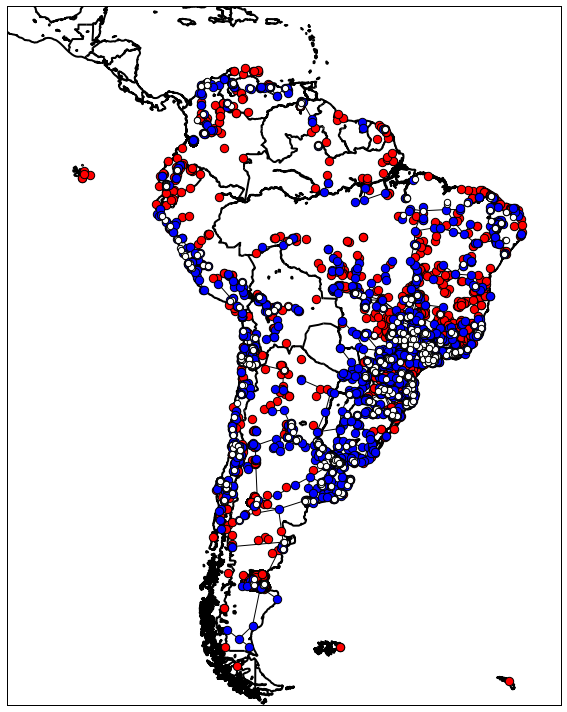

In [568]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)

#Bounding box
#x1, x2, y1, y2 = get_bb(country)
x1 = -100
x2 = -30
y1 = -56
y2 = 20

m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=20)
m.drawcountries(linewidth=2)
m.drawcoastlines(linewidth=2)

pos = dict((int(node), m(get_longitude( int(node) ), get_latitude( int(node) )) ) for node in G.nodes())

nx.draw_networkx_nodes(G, pos, nodelist=generators, node_size = 70, node_color = 'r')
nx.draw_networkx_nodes(G, pos, nodelist=stations, node_size = 70, node_color = 'b')
nx.draw_networkx_nodes(G, pos, nodelist=others, node_size = 40, node_color = 'w')
nx.draw_networkx_edges( G, pos)
plt.tight_layout()
plt.savefig('./Continents/%s/PNG/South_America_heuristic.png'%(country))
plt.show()

### Save the graph

In [569]:
nx.write_gml(G,'./Continents/%s/gml/South_America_heuristic.gml'%(country))

In [338]:
edges.to_csv('./Countries/%s/Edges/heuristic_links2.csv'%(country),
             index=False, sep='#')

In [339]:
nodes2 = pd.read_csv('./Countries/%s/Edges/heuristic_links2.csv'%country, delimiter='#')

In [340]:
len(nodes2)

4768